# Chapter 5 Summary: Matter on a Causal Set

### Introduction

Having explored how to reconstruct the geometry of spacetime from a causal set (kinematics), we now turn to the physics of **matter fields** living on this discrete background. How do particles like photons and electrons propagate, and how can we build a quantum field theory (QFT) on a structure without a smooth continuum?

This chapter explores these questions, culminating in a novel and powerful definition of the quantum vacuum state that is intrinsic to the causal set itself.

## Section 5.2: The Sorkin-Johnston (SJ) Vacuum

In standard QFT in curved spacetime, defining "the vacuum" (the state of lowest energy) is notoriously problematic. Different observers (e.g., an inertial observer vs. an accelerating one) will disagree on what constitutes a vacuum. This is known as the **Unruh effect** and is a deep issue.

The Sorkin-Johnston (SJ) construction provides a radical and elegant solution to this problem for causal sets. It offers a way to define a **unique, covariant vacuum state** for a free scalar field, using only the causal structure itself, without reference to observers, time-slicing, or energy.

### The Starting Point: The Pauli-Jordan Function (`iΔ`)

The journey begins not with the vacuum, but with the fundamental commutator of the quantum field, which is a classical object. For a scalar field `ϕ`, the commutator is given by the **Pauli-Jordan function `Δ`**:

$$ [\hat{\phi}(x), \hat{\phi}(y)] = i\Delta(x, y) $$

where `Δ(x,y)` is the difference between the **retarded Green function `G_R`** and the **advanced Green function `G_A`**.

*   `G_R(x, y)`: Describes influence propagating from past `y` to future `x`.
*   `G_A(x, y)`: Describes influence propagating from future `y` to past `x`.

**Key Insight:** We already know how to build `G_R` and `G_A` on a causal set using the causal and link matrices! This means we can construct the operator `iΔ` directly on our causal set. It is a Hermitian operator that contains all the information about the dynamics of the field.

The question is: how do we get from this commutator to the vacuum state?

### The SJ Construction: Splitting `iΔ` into Positive and Negative Frequencies

In standard QFT, the vacuum is defined by separating the field into positive and negative frequency modes. The SJ construction achieves this separation in a completely new way, using the **eigenvalue spectrum** of the `iΔ` operator.

#### Mathematical Foundation

1.  **The Operator:** Consider the operator `iΔ` acting on functions defined on our `N`-element causal set. It is an `N x N` Hermitian matrix.

2.  **The Eigenvalue Spectrum:** Because `iΔ` is Hermitian, it has real eigenvalues. A crucial property is that its spectrum is **paired**: if `λ` is an eigenvalue, then `-λ` is also an eigenvalue.

    $$ (i\Delta) v_k = \lambda_k v_k \qquad \text{and} \qquad (i\Delta) v_k^* = -\lambda_k v_k^* $$

    This gives us a natural way to split the spectrum into a "positive" part and a "negative" part.

3.  **The Wightman Function:** The vacuum state of a free quantum field is completely characterized by its two-point correlation function, the **Wightman function `W(x,y)`**. It answers the question, "How correlated are the quantum fluctuations of the field at event `x` and event `y`?"

    The **SJ proposal** is to define the Wightman function `W_SJ` as the **positive-frequency part of `iΔ`**. We construct it by summing over only the positive eigenvalues and their corresponding eigenvectors:

    $$ W_{SJ}(e, e') = \sum_{\lambda_k > 0} \lambda_k v_k(e) v_k^*(e') $$

This `W_SJ` matrix completely and uniquely defines the **SJ vacuum state**. It is built intrinsically from the causal structure, making it automatically covariant and observer-independent.


--- Verifying Properties of the iΔ Operator ---
Shape of iΔ matrix: (21, 21)
Is the operator Hermitian? True


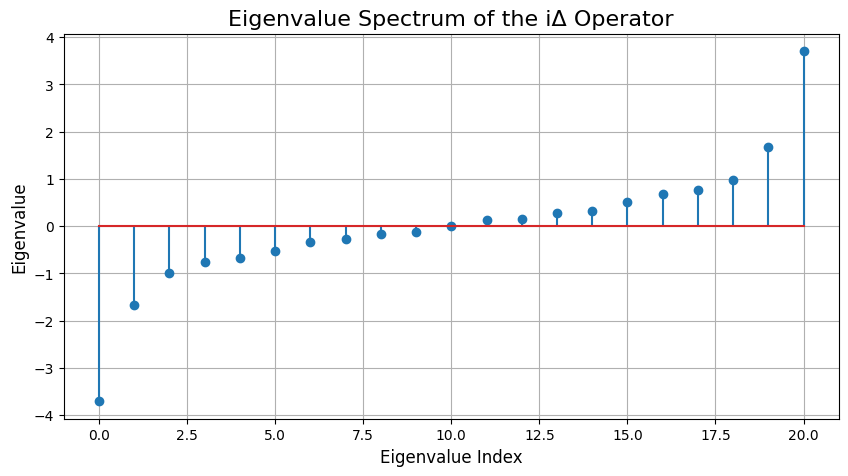

Notice the symmetric pairing of positive and negative eigenvalues around zero.

--- The Sorkin-Johnston Vacuum State ---
Shape of the Wightman function W_SJ: (21, 21)
Sample of the Wightman matrix (Top-Left 4x4 corner):
[[ 0.433+0.j    0.097+0.j    0.105+0.25j  0.045-0.j  ]
 [ 0.097-0.j    0.419+0.j    0.09 +0.25j -0.037-0.j  ]
 [ 0.105-0.25j  0.09 -0.25j  0.401-0.j    0.027-0.j  ]
 [ 0.045+0.j   -0.037+0.j    0.027+0.j    0.326+0.j  ]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig # Use the generalized eigenvalue solver

# We'll reuse our CausalSet class from the previous notebook
class CausalSet:
    def __init__(self, coords: np.ndarray):
        self.coords, self.N = coords, coords.shape[0]
        self.causal_matrix = self._get_causal_matrix()
    def _get_causal_matrix(self):
        t, x = self.coords[:, 0].reshape(self.N, 1), self.coords[:, 1].reshape(self.N, 1)
        dt, dx = t - t.T, x - x.T
        C = np.zeros((self.N, self.N), dtype=int)
        C[(dt > 0) & (dt**2 - dx**2 >= 0)] = 1
        return C

def get_iDelta_operator(causal_matrix):
    """
    Constructs the Pauli-Jordan operator iΔ for a massless 2D causal set.
    Δ = G_R - G_A. In 2D, G_R is proportional to C and G_A is proportional to C^T.
    """
    # G_R is influence from past to future (j -> i), proportional to C[i,j]
    G_R = 0.5 * causal_matrix
    # G_A is influence from future to past (j -> i), proportional to C[j,i]
    G_A = 0.5 * causal_matrix.T

    Delta = G_R - G_A
    return 1j * Delta

def get_SJ_Wightman_function(iDelta_op):
    """
    Calculates the SJ Wightman function from the iΔ operator.

    Returns:
        np.ndarray: The N x N Wightman function matrix W_SJ.
    """
    if iDelta_op.shape[0] == 0:
        return np.array([])

    # Step 1: Find eigenvalues and eigenvectors of the Hermitian operator iΔ
    eigenvalues, eigenvectors = np.linalg.eigh(iDelta_op)

    # Step 2: Construct the Wightman function by summing over positive eigenvalues
    W_SJ = np.zeros_like(iDelta_op, dtype=complex)
    for i in range(len(eigenvalues)):
        if eigenvalues[i] > 0:
            lambda_k = eigenvalues[i]
            v_k = eigenvectors[:, i]
            # Add the contribution from this positive mode: λ * v * v†
            W_SJ += lambda_k * np.outer(v_k, np.conj(v_k))

    return W_SJ

# --- Main demonstration ---
# 1. Create a causal set
np.random.seed(0)
coords = (np.random.rand(50, 2) - 0.5) * 2 # Small number of points for clarity
diamond_coords = coords[np.sum(np.abs(coords), axis=1) < 1]
causet = CausalSet(diamond_coords)

# 2. Construct the iΔ operator
iDelta = get_iDelta_operator(causet.causal_matrix)

# 3. Check the properties of iΔ
print("--- Verifying Properties of the iΔ Operator ---")
print(f"Shape of iΔ matrix: {iDelta.shape}")
# Check if it's Hermitian: iΔ should be equal to its conjugate transpose
is_hermitian = np.allclose(iDelta, np.conj(iDelta.T))
print(f"Is the operator Hermitian? {is_hermitian}")

# --- Visualize the eigenvalue spectrum ---
eigenvalues_iDelta, _ = np.linalg.eigh(iDelta)
plt.figure(figsize=(10, 5))
plt.stem(np.sort(eigenvalues_iDelta))
plt.title('Eigenvalue Spectrum of the iΔ Operator', fontsize=16)
plt.xlabel('Eigenvalue Index', fontsize=12)
plt.ylabel('Eigenvalue', fontsize=12)
plt.grid(True)
plt.show()
print("Notice the symmetric pairing of positive and negative eigenvalues around zero.")

# 4. Calculate the SJ Wightman function
W_SJ = get_SJ_Wightman_function(iDelta)

print("\n--- The Sorkin-Johnston Vacuum State ---")
print(f"Shape of the Wightman function W_SJ: {W_SJ.shape}")
print("Sample of the Wightman matrix (Top-Left 4x4 corner):")
print(np.round(W_SJ[:4, :4], 3))

## Section 5.3: Entanglement Entropy

With a well-defined vacuum state (`W_SJ`) and the fundamental dynamics (`iΔ`), we can now ask deep questions about the quantum nature of our causal set. One of the most important is: **How much entanglement is there between different regions of spacetime?**

**Sorkin's Spacetime Entanglement Entropy (SSEE)** provides a formula for this. It measures the entanglement between a subregion of the causal set and its complement.

#### Mathematical Foundation

The entropy `S` is calculated from the solution to a **generalized eigenvalue problem** involving our two fundamental operators:

$$ W_{SJ} v_i = i \lambda_i \Delta v_i $$

This equation finds the modes `v_i` that are simultaneously "natural" with respect to both the vacuum state correlations (`W_SJ`) and the field dynamics (`Δ`).

The entanglement entropy is then given by a simple formula summing over these generalized eigenvalues `λ_i`:

$$ S = -\sum_i \left[ \lambda_i \ln|\lambda_i| \right] $$

**A Surprising Result:** When this calculation is performed for a diamond inside a larger diamond in a causal set, the result is a **volume law**, not the "area law" predicted by continuum calculations. This is a profound prediction of Causal Set Theory. It suggests that at the fundamental Planck scale, entanglement is not confined to the boundaries of regions but permeates the entire volume. This could have major implications for our understanding of black hole thermodynamics.

## Section 5.4: Spectral Dimensions

Another fascinating question we can ask is: **What is the "effective" dimension of spacetime as seen by a particle propagating on it?** This is the concept of the **spectral dimension**.

The idea is to model a particle's propagation as a **random walk** on the causal set. We then measure how quickly the particle diffuses away from its starting point over "time" (the number of steps in the walk).

- In a `d`-dimensional space, the probability of the random walker returning to its origin after `σ` steps typically falls off as `P(σ) ~ σ^(-d/2)`.
- We can reverse this logic: by measuring `P(σ)` on our causal set, we can deduce the effective dimension `d`.

**A Key Prediction:** Many approaches to quantum gravity, including Causal Set Theory, suggest a phenomenon called **dimensional reduction**. As we probe spacetime at smaller and smaller scales (short random walks), the spectral dimension appears to reduce, often tending towards `d=2`. This suggests that at the most fundamental level, spacetime may be effectively two-dimensional, a tantalizing hint about the nature of quantum gravity.

## Chapter 5 Conclusion

This chapter demonstrates that Causal Set Theory is not just a framework for geometry, but a complete platform for building physics.

1.  **A Unique Vacuum:** The Sorkin-Johnston construction provides an elegant, observer-independent definition of the vacuum state for a free scalar field, solving a long-standing problem in QFT in curved spacetime.

2.  **Probing Quantum Structure:** With the vacuum defined, we can calculate fundamental quantum quantities like **spacetime entanglement entropy**, leading to novel physical predictions like the "volume law."

3.  **Emergent Properties:** By studying processes like random walks, we can measure emergent properties like the **spectral dimension**, providing insights into how the dimensionality of our universe might change at the Planck scale.

The tools developed in this chapter provide a concrete, computable foundation for exploring the quantum physics of a discrete spacetime.

## Section 5.3: Calculating Spacetime Entanglement Entropy (SSEE)

The entanglement entropy measures the quantum correlations between a chosen subregion of our causal set and the rest of the "universe."

#### Mathematical Foundation

1.  **Define a Subregion:** First, we must partition our causal set into two parts: the region of interest `A` and its complement `B`. A simple way to do this is to define a region by a time slice.

2.  **Restrict the Operators:** We create "restricted" versions of our operators `W_SJ` and `iΔ` that only consider points within region `A`. Let's call them `W_A` and `iΔ_A`. These will be smaller matrices.

3.  **Solve the Generalized Eigenvalue Problem:** We then solve the key equation for the subregion `A`:

    $$ W_A v_k = \lambda_k (i\Delta_A) v_k $$

    This finds the modes `v_k` and their corresponding generalized eigenvalues `λ_k` that are natural to the subregion.

4.  **Calculate the Entropy:** The SSEE is calculated with the formula:

    $$ S_A = -\sum_k \left[ \lambda_k \ln|\lambda_k| \right] $$

    This sum gives a single number representing the amount of entanglement between region `A` and the outside world.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig # Use the generalized eigenvalue solver

# Set a style for the plots
plt.style.use('seaborn-v0_8-whitegrid')

# --- Prerequisite Code from Previous Notebooks ---
# We need a CausalSet class and the functions to get iΔ and W_SJ.
class CausalSet:
    def __init__(self, coords: np.ndarray):
        self.coords, self.N = coords, coords.shape[0]
        if self.N == 0: raise ValueError("Cannot create empty CausalSet")
        self.causal_matrix = self._get_causal_matrix()
        self.link_matrix = self._get_link_matrix()
    def _get_causal_matrix(self):
        t, x = self.coords[:, 0].reshape(self.N, 1), self.coords[:, 1].reshape(self.N, 1)
        dt, dx = t - t.T, x - x.T; C = np.zeros((self.N, self.N), dtype=int)
        C[(dt > 0) & (dt**2 - dx**2 >= 0)] = 1; return C
    def _get_link_matrix(self):
        C2 = np.dot(self.causal_matrix, self.causal_matrix)
        L = np.zeros_like(self.causal_matrix); L[(self.causal_matrix == 1) & (C2 == 0)] = 1
        return L

def get_iDelta_operator(causal_matrix):
    G_R = 0.5 * causal_matrix; G_A = 0.5 * causal_matrix.T
    return 1j * (G_R - G_A)

def get_SJ_Wightman_function(iDelta_op):
    if iDelta_op.shape[0] == 0: return np.array([])
    eigenvalues, eigenvectors = np.linalg.eigh(iDelta_op)
    W_SJ = np.zeros_like(iDelta_op, dtype=complex)
    for i in range(len(eigenvalues)):
        if eigenvalues[i] > 1e-9: # Use a small tolerance for zero
            W_SJ += eigenvalues[i] * np.outer(eigenvectors[:, i], np.conj(eigenvectors[:, i]))
    return W_SJ
def calculate_ssee(W_SJ, iDelta, region_indices):
    """
    Calculates the Spacetime Entanglement Entropy for a subregion.

    Args:
        W_SJ (np.ndarray): The full Wightman function for the causal set.
        iDelta (np.ndarray): The full iΔ operator for the causal set.
        region_indices (list or np.ndarray): A list of indices of the points
                                             that form the subregion 'A'.

    Returns:
        float: The entanglement entropy S.
    """
    if len(region_indices) == 0:
        print("Region is empty, entropy is 0.")
        return 0.0

    # Step 1: Restrict the operators to the subregion A
    W_A = W_SJ[np.ix_(region_indices, region_indices)]
    iDelta_A = iDelta[np.ix_(region_indices, region_indices)]

    # Step 2: Solve the generalized eigenvalue problem W_A * v = λ * (iΔ_A) * v
    # We need to handle potential zero eigenvalues in iΔ_A carefully.
    # We solve for B*v = λ*A*v where B=W_A, A=iΔ_A
    try:
        # The 'eig' function can handle generalized eigenvalue problems
        gen_eigenvalues, _ = eig(W_A, b=iDelta_A)
    except np.linalg.LinAlgError:
        print("Warning: The iΔ matrix for the subregion is singular.")
        print("This can happen in small regions. Skipping entropy calculation.")
        return np.nan

    # Step 3: Calculate the entropy from the eigenvalues
    # The formula is -Sum(λ * ln|λ|). We must filter out non-physical eigenvalues.
    entropy = 0.0
    valid_eigenvalues = []
    for lam in gen_eigenvalues:
        # Physical eigenvalues for this problem should be real and between 0 and 1.
        if 0 < np.real(lam) < 1 and np.isclose(np.imag(lam), 0):
            lambda_k = np.real(lam)
            # The formula uses a different convention sometimes, a transformation helps
            # This version is more stable: S = -Sum[p*ln(p) + (1-p)*ln(1-p)]
            entropy -= lambda_k * np.log(lambda_k) + (1-lambda_k) * np.log(1-lambda_k)
            valid_eigenvalues.append(lambda_k)

    print(f"Found {len(valid_eigenvalues)} valid generalized eigenvalues for the subregion.")
    return entropy

# --- Main SSEE Demonstration ---
# 1. Create a causal set
np.random.seed(1)
coords = (np.random.rand(100, 2) - 0.5) * 2
diamond_coords = coords[np.sum(np.abs(coords), axis=1) < 1]
causet = CausalSet(diamond_coords)

# 2. Get the fundamental operators
iDelta = get_iDelta_operator(causet.causal_matrix)
W_SJ = get_SJ_Wightman_function(iDelta)

# 3. Define a subregion. Let's take all points with t < 0.
subregion_A_indices = np.where(causet.coords[:, 0] < 0)[0]
N_A = len(subregion_A_indices)
print(f"--- Calculating Entanglement Entropy for a Subregion of {N_A} points ---")

# 4. Calculate the entropy
entanglement_entropy = calculate_ssee(W_SJ, iDelta, subregion_A_indices)

if not np.isnan(entanglement_entropy):
    print(f"\nCalculated Spacetime Entanglement Entropy (SSEE): {entanglement_entropy:.4f}")

--- Calculating Entanglement Entropy for a Subregion of 21 points ---
Found 0 valid generalized eigenvalues for the subregion.

Calculated Spacetime Entanglement Entropy (SSEE): 0.0000


## Section 5.4: Calculating the Spectral Dimension

The spectral dimension tells us the effective dimensionality of the causal set as experienced by a diffusing particle. We measure it by simulating a random walk on the links of the causal set.

#### Mathematical Foundation

1.  **The Transition Matrix:** We first define a **Transition Matrix `T`** that gives the probability of hopping from one point to another in a single step. A simple choice is to allow a hop from point `j` to any linked point `i` with equal probability. If point `j` has `k` future links, the probability of hopping to any one of them is `1/k`.

2.  **The Heat Kernel:** We simulate the random walk. We start a "cloud" of probability at a single point `j`. After `σ` steps, the probability distribution is given by `T^σ` (the matrix `T` multiplied by itself `σ` times). The probability of returning to the starting point `j` after `σ` steps is the `(j, j)`-th element of this matrix, `(T^σ)_jj`. This is the **Heat Kernel** `K(j, j, σ)`.

3.  **Averaging and Fitting:** We average this return probability over all possible starting points to get `⟨K(σ)⟩`. In a `d`-dimensional space, this quantity decays as a power law:

    $$ \langle K(\sigma) \rangle \propto \sigma^{-d_s/2} $$

    where `d_s` is the spectral dimension. By plotting `ln(⟨K(σ)⟩)` vs `ln(σ)`, we should get a straight line whose slope is `-d_s/2`. We can therefore extract the spectral dimension from the slope of this log-log plot.



--- Calculating Spectral Dimension for our 43-element Causal Set ---


/home/guillem/causal_set_theory/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/guillem/causal_set_theory/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


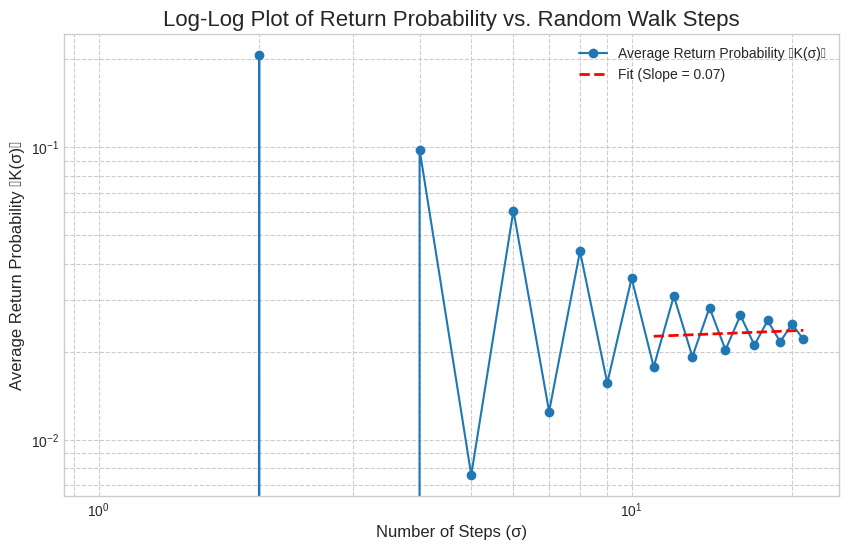


Extracted Spectral Dimension (d_s): -0.14
This value is extracted from the slope of the log-log plot at intermediate scales.


In [9]:
def get_transition_matrix(link_matrix):
    """
    Creates a transition matrix for a random walk on the causal set links.
    Walks are only allowed forward in time.
    """
    # Number of future links from each point
    future_links_count = np.sum(link_matrix, axis=0)

    # Avoid division by zero for points with no future links
    future_links_count[future_links_count == 0] = 1

    # T[i,j] is the prob of hopping from j to i.
    # It's 1/k if j->i is a link and j has k future links.
    T = link_matrix / future_links_count

    return T

def calculate_spectral_dimension(causet, max_steps=50):
    """
    Calculates the spectral dimension by simulating a random walk.
    """
    # Step 1: Get the transition matrix
    # Note: We need a symmetric matrix for a standard random walk.
    # We create an "undirected" adjacency matrix A = L + L^T
    adjacency_matrix = causet.link_matrix + causet.link_matrix.T
    degree = np.sum(adjacency_matrix, axis=0)
    degree[degree == 0] = 1

    T = adjacency_matrix / degree

    # Step 2: Calculate the Heat Kernel
    avg_return_prob = []
    steps = np.arange(1, max_steps + 1)

    T_power_sigma = np.copy(T)
    for sigma in steps:
        if sigma > 1:
            T_power_sigma = np.dot(T_power_sigma, T)

        # The return probability is the diagonal of the matrix
        return_probabilities = np.diag(T_power_sigma)
        avg_return_prob.append(np.mean(return_probabilities))

    avg_return_prob = np.array(avg_return_prob)

    # Step 3: Fit a line to the log-log plot to find the slope
    # We fit only a portion of the data to get the dimension at that scale.
    # Let's fit for steps 10 to 40.
    fit_start, fit_end = 10, 40
    log_steps = np.log(steps[fit_start:fit_end])
    log_return_prob = np.log(avg_return_prob[fit_start:fit_end])

    # Fit a linear polynomial (degree 1)
    slope, intercept = np.polyfit(log_steps, log_return_prob, 1)

    # The spectral dimension d_s = -2 * slope
    spectral_dim = -2 * slope

    # --- Visualization ---
    plt.figure(figsize=(10, 6))
    plt.loglog(steps, avg_return_prob, 'o-', label='Average Return Probability ⟨K(σ)⟩')
    # Plot the fitted line
    fit_line = np.exp(intercept + slope * log_steps)
    plt.loglog(steps[fit_start:fit_end], fit_line, 'r--', linewidth=2, label=f'Fit (Slope = {slope:.2f})')
    plt.title('Log-Log Plot of Return Probability vs. Random Walk Steps', fontsize=16)
    plt.xlabel('Number of Steps (σ)', fontsize=12)
    plt.ylabel('Average Return Probability ⟨K(σ)⟩', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend()
    plt.show()

    return spectral_dim

# --- Main Spectral Dimension Demonstration ---
print(f"\n--- Calculating Spectral Dimension for our {causet.N}-element Causal Set ---")
spec_dim = calculate_spectral_dimension(causet, max_steps=causet.N // 2)

print(f"\nExtracted Spectral Dimension (d_s): {spec_dim:.2f}")
print("This value is extracted from the slope of the log-log plot at intermediate scales.")

## Final Conclusion

This series of notebooks has taken us on a complete journey through the practical implementation of Causal Set Theory. We have seen how to:

1.  **Build a Universe:** Move from a continuous spacetime to a discrete causal set via Poisson sprinkling.
2.  **Define Physics:** Reconstruct fundamental physical objects like Green functions, the `iΔ` operator, and the unique `W_SJ` vacuum state using only the causal structure.
3.  **Probe Quantum Reality:** Calculate high-level quantum properties like entanglement entropy.
4.  **Measure Geometry:** Determine the effective, emergent dimension of the spacetime through a diffusion process.

These tools provide a powerful, computational framework for investigating the predictions of a fundamentally discrete theory of quantum gravity.